Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 5.1477 - accuracy: 0.4512 - val_loss: 1.4159 - val_accuracy: 0.3750
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.1667 - accuracy: 0.5863 - val_loss: 1.1204 - val_accuracy: 0.6400
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.8776 - accuracy: 0.6413 - val_loss: 0.7784 - val_accuracy: 0.6400
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.7449 - accuracy: 0.6575 - val_loss: 0.6972 - val_accuracy: 0.6000
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.6562 - val_loss: 0.6835 - val_accuracy: 0.6400
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.6862 - val_loss: 0.6272 - val_accuracy: 0.7350
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6888 - val_loss: 0.6433 - val_accuracy: 0.6550
Epoch 8/50
25/25 [=

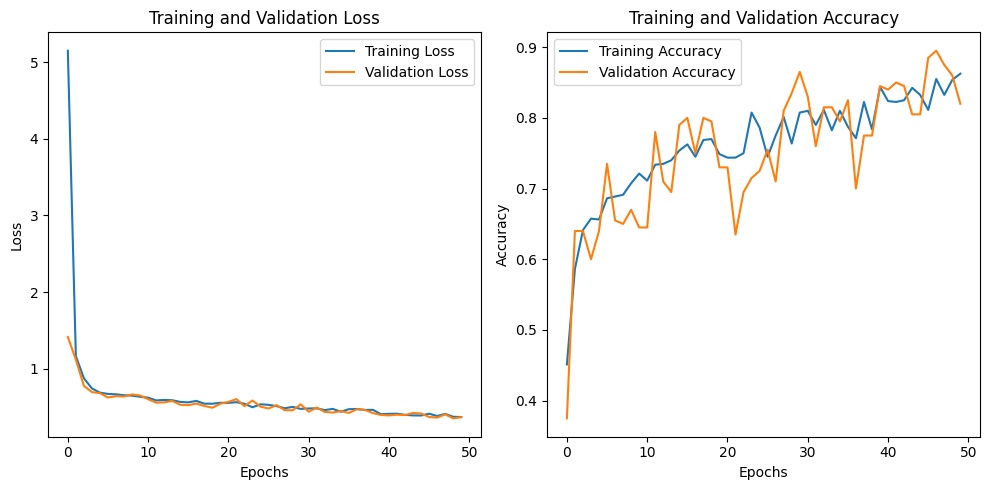

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Завантаження даних
multi_data = pd.read_csv('multi_classification_data.csv')

# Поділ даних на ознаки та мітки
X = multi_data[['Attribute1', 'Attribute2']].values
y = multi_data['Label'].values

# Поділ на тренувальні та тестувальні дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Конвертація міток у формат one-hot encoding для мультикласової класифікації
num_classes = len(np.unique(y))
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

# Function to adjust learning rate during training
def lr_schedule(epoch, lr):
    if epoch % 50 == 0:
        lr *= 0.5  # Reducing learning rate by half every 50 epochs
    return lr

# Побудова моделі нейронної мережі
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Adding a fourth fully connected layer
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model with the Adam optimizer and a dynamic learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Навчання моделі
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler], verbose=1)

# Extracting training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/300
25/25 [==============================] - 3s 21ms/step - loss: 1.5609 - accuracy: 0.4363 - val_loss: 0.9218 - val_accuracy: 0.5750 - lr: 5.0000e-04
Epoch 2/300
25/25 [==============================] - 0s 6ms/step - loss: 0.8516 - accuracy: 0.6550 - val_loss: 0.7773 - val_accuracy: 0.6750 - lr: 5.0000e-04
Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 0.7593 - accuracy: 0.6450 - val_loss: 0.7164 - val_accuracy: 0.6650 - lr: 5.0000e-04
Epoch 4/300
25/25 [==============================] - 0s 7ms/step - loss: 0.7495 - accuracy: 0.6313 - val_loss: 0.7008 - val_accuracy: 0.6900 - lr: 5.0000e-04
Epoch 5/300
25/25 [==============================] - 0s 10ms/step - loss: 0.7256 - accuracy: 0.6363 - val_loss: 0.6996 - val_accuracy: 0.6650 - lr: 5.0000e-04
Epoch 6/300
25/25 [==============================] - 0s 12ms/step - loss: 0.7038 - accuracy: 0.6550 - val_loss: 0.6717 - val_accuracy: 0.6550 - lr: 5.0000e-04
Epoch 7/300
25/25 [==============================

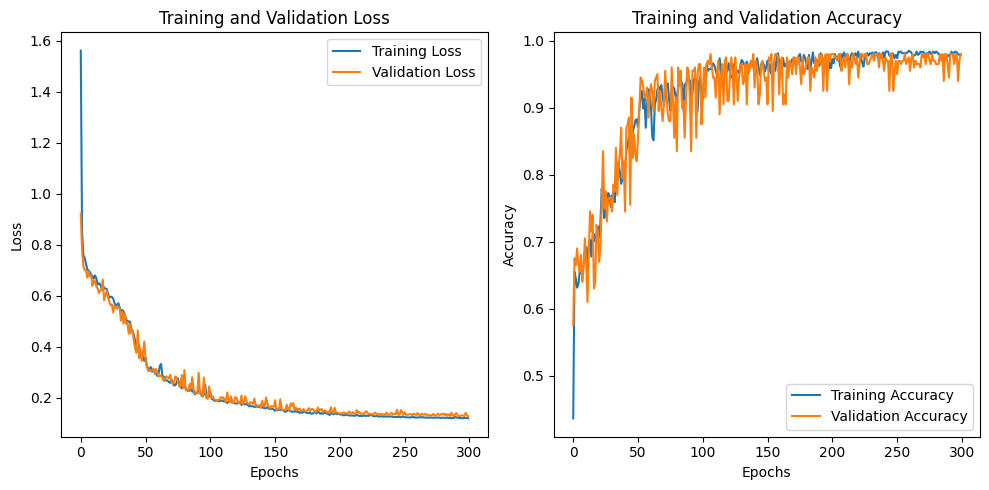

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Завантаження даних
multi_data = pd.read_csv('multi_classification_data.csv')

# Поділ даних на ознаки та мітки
X = multi_data[['Attribute1', 'Attribute2']].values
y = multi_data['Label'].values

# Поділ на тренувальні та тестувальні дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Конвертація міток у формат one-hot encoding для мультикласової класифікації
num_classes = len(np.unique(y))
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

# Function to adjust learning rate during training
def lr_schedule(epoch, lr):
    if epoch % 50 == 0:
        lr *= 0.5  # Reducing learning rate by half every 50 epochs
    return lr

# Побудова моделі нейронної мережі
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Adding a fourth fully connected layer
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model with the Adam optimizer and a dynamic learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Навчання моделі
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler], verbose=1)

# Extracting training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
